In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_theme(style="darkgrid")


In [24]:
path = r"CBS.csv"

data = pd.read_csv(path,sep=';',skiprows=[0, 1, 2, 3 ],header=[0, 1, 2],index_col=[0])
data = data.replace(',', '.', regex=True)

data = data.dropna(thresh=data.shape[1] - 1)
data = data.drop('Unnamed: 1_level_0',axis=1,level=0)
data.index = data.index.str.replace('*', '', regex=False)
speed_column_names = []

travel_motives = ['Totaal', 'Auto (bestuurder)', 'Auto (passagier)', 'Bus/tram/metro', 'Trein', 'Fiets', 'Lopen', 'Overige vervoerwijze']

motive_labels = ['Average', 'Car', 'Car (Passenger)', 'Bus, tram and metro', 'Train', 'Bicycle', 'Walking', 'Others']

for i, motive in enumerate(travel_motives):
    data[(motive, 'Afgelegde afstand per rit (gemiddeld)', 'km')] = pd.to_numeric(data[(motive, 'Afgelegde afstand per rit (gemiddeld)', 'km')], errors='coerce')
    data[(motive, 'Reisduur per rit', 'Minuten')] = pd.to_numeric(data[(motive, 'Reisduur per rit', 'Minuten')], errors='coerce')
    
    travel_motive_speed = (data.loc[:, (motive, 'Afgelegde afstand per rit (gemiddeld)', 'km')]) / (data.loc[:, (motive, 'Reisduur per rit', 'Minuten')] / 60)
    data.insert(4 + i * 4, motive_labels[i], travel_motive_speed)
    speed_column_names.append(motive_labels[i])
#display(data)
    
yearlydata = data[data[('Vervoerwijzen', 'Onderwerp', 'Reismotieven')] == 'Totaal']
display(yearlydata)

Vervoerwijzen                                 Totaal  \
             Onderwerp Ritten per persoon per dag (gemiddeld)   
Perioden  Reismotieven                                 aantal   
1999            Totaal                                   3.41   
2000            Totaal                                   3.35   
2001            Totaal                                    3.3   
2002            Totaal                                    3.3   
2003            Totaal                                    3.3   
2004            Totaal                                   3.29   
2005            Totaal                                   3.23   
2006            Totaal                                   3.25   
2007            Totaal                                    3.2   
2008            Totaal                                   3.17   
2009            Totaal                                    3.2   
2010            Totaal                                   3.21   
2011            Totaal                                   3.09   
2012            Totaal                                   3.11   
2013            Totaal                                   3.12   
2014            Totaal                                   3.13   
2015            Totaal                                   3.03   
2016            Totaal                                   2.99   
2017            Totaal                                   2.95   
2018            Totaal                                   3.04   
2019            Totaal                                   2.97   

                                                                   Average  \
         Afgelegde afstand per rit (gemiddeld) Reisduur per rit              
Perioden                                    km          Minuten              
1999                                     10.96            23.72  27.723440   
2000                                     11.00            23.73  27.812895   
2001                                     10.99            23.67  27.858048   
2002                                     11.01            23.49  28.122605   
2003                                     11.04            23.65  28.008457   
2004                                     11.03            23.58  28.066158   
2005                                     11.07            23.69  28.037146   
2006                                     11.01            23.69  27.885184   
2007                                     11.07            23.88  27.814070   
2008                                     10.82            23.41  27.731739   
2009                                     10.90            23.58  27.735369   
2010                                     10.93            23.50  27.906383   
2011                                     11.21            23.76  28.308081   
2012                                     11.13            23.84  28.011745   
2013                                     11.19            23.64  28.401015   
2014                                     11.23            24.07  27.993353   
2015                                     11.36            24.14  28.235294   
2016                                     11.34            24.10  28.232365   
2017                                     11.50            24.12  28.606965   
2018                                     11.55            24.15  28.695652   
2019                                     11.64            24.18  28.883375   

                              Auto (bestuurder)  \
         Ritten per persoon per dag (gemiddeld)   
Perioden                                 aantal   
1999                                       1.06   
2000                                       1.05   
2001                                       1.03   
2002                                       1.05   
2003                                       1.04   
2004                                       1.04   
2005                                       1.01   
2006                                       1.01   
2007          

In [26]:
speeddata = yearlydata[speed_column_names]
speeddata.columns = speeddata.columns.droplevel([1, 2])
display(speeddata)

,Average,Car,Car (Passenger),"Bus, tram and metro",Train,Bicycle,Walking,Others
1999,27.723440,40.552070,40.197044,26.207650,60.649095,10.031546,3.737422,31.810585
2000,27.812895,40.760870,40.261484,26.328096,60.554900,10.105263,3.780199,31.655172
2001,27.858048,40.952381,40.561279,26.232044,60.462542,10.174881,3.849057,31.718310
2002,28.122605,41.012976,40.662393,25.796460,60.213861,10.229089,3.835351,32.496075
2003,28.008457,41.382757,41.160555,25.101364,59.796407,10.246202,3.826749,33.065357
2004,28.066158,41.301285,41.192758,24.845133,59.462044,10.309062,3.869077,32.093458
2005,28.037146,41.764948,41.581197,23.969015,59.052568,10.346970,3.978547,32.965272
2006,27.885184,41.933361,41.569892,22.843320,59.044355,10.460733,3.996194,33.476162
2007,27.814070,41.882160,41.396348,22.527881,58.896970,10.482115,4.044944,31.575200
2008,27.731739,41.657776,40.592058,22.407477,59.174089,10.560254,4.003955,31.289614


<Figure size 2100x600 with 0 Axes>

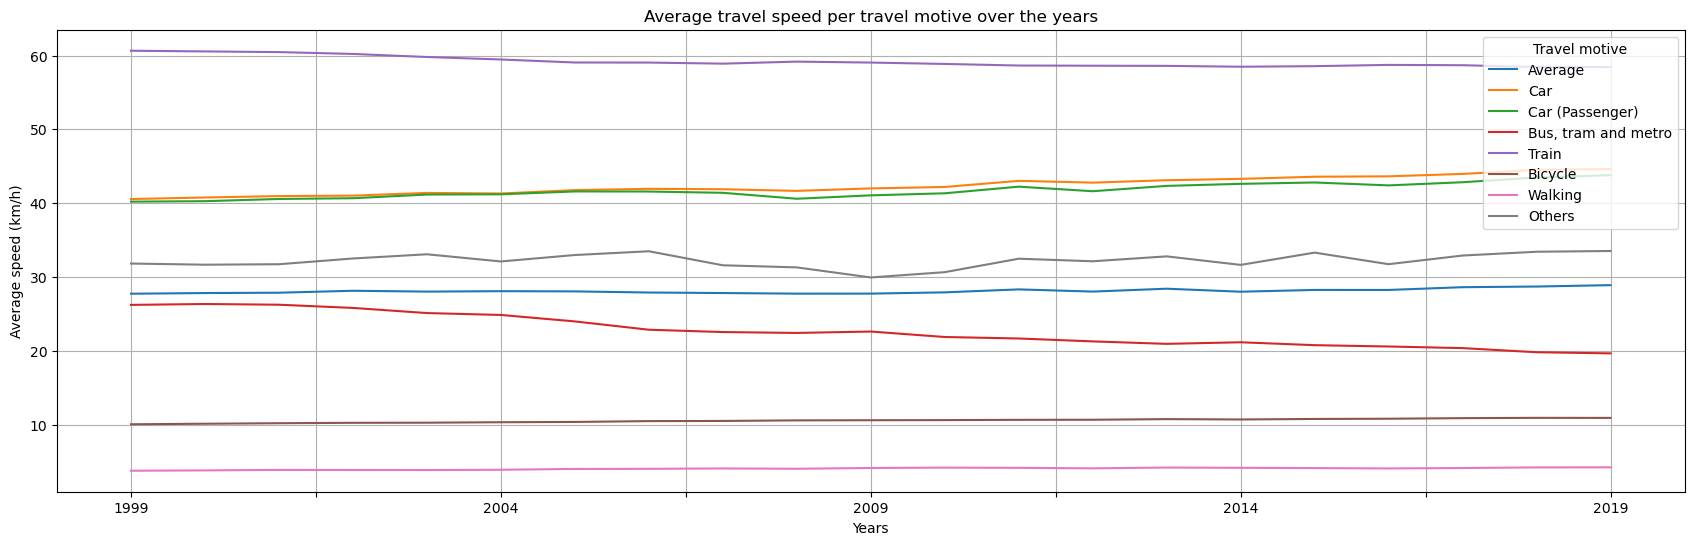

In [27]:
plt.figure(figsize=(21, 6), dpi=100)
speeddata.plot(figsize=(21, 6))
plt.grid()
plt.title('Average travel speed per travel motive over the years')
plt.xlabel('Years')
plt.ylabel('Average speed (km/h)')
plt.legend(title='Travel motive', loc='upper left')
plt.savefig('SubquestionWouterJelle_figures/travelmotives.png')

<Figure size 2100x600 with 0 Axes>

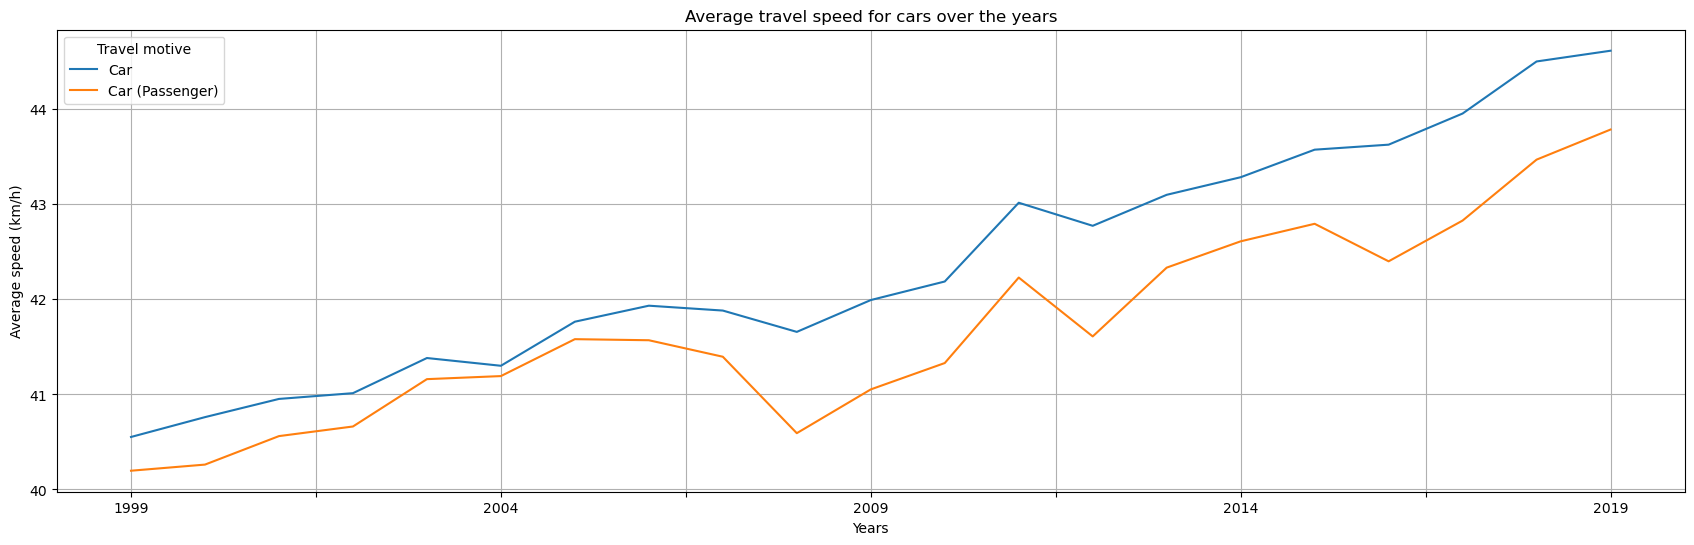

In [33]:
#Cars
car_columns = ['Car', 'Car (Passenger)']

plt.figure(figsize=(21, 6), dpi=100)
speeddata[car_columns].plot(figsize=(21, 6))
plt.grid()
plt.title('Average travel speed for cars over the years')
plt.xlabel('Years')
plt.ylabel('Average speed (km/h)')
plt.legend(title='Travel motive', loc='upper left')
plt.savefig('SubquestionWouterJelle_figures/travelspeecars.png')

<Figure size 2100x600 with 0 Axes>

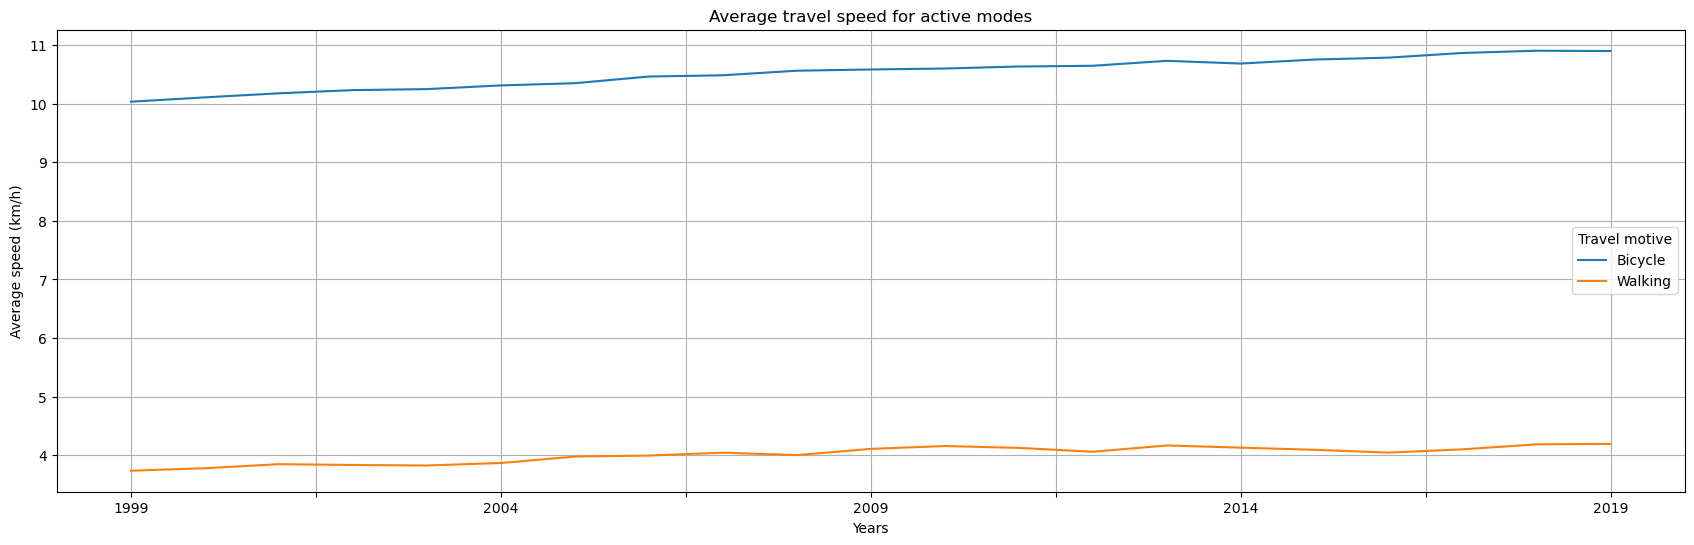

In [29]:
#Active modes
active_columns = ['Bicycle', 'Walking']

plt.figure(figsize=(21, 6), dpi=100)
speeddata[active_columns].plot(figsize=(21, 6))
plt.grid()
plt.title('Average travel speed for active modes')
plt.xlabel('Years')
plt.ylabel('Average speed (km/h)')
plt.legend(title='Travel motive', loc='upper left')
plt.savefig('SubquestionWouterJelle_figures/travelspeedactivemodes.png')

<Figure size 2100x600 with 0 Axes>

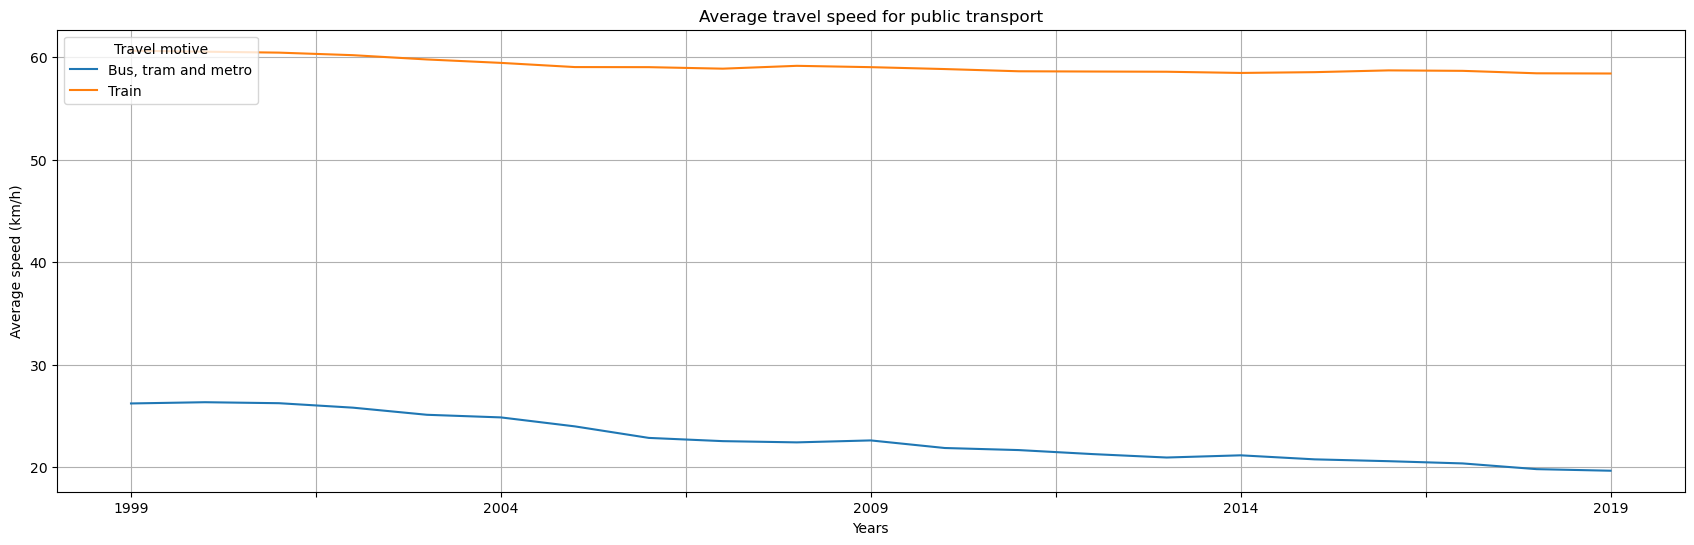

In [34]:
#Public transport
active_columns = ['Bus, tram and metro', 'Train']

plt.figure(figsize=(21, 6), dpi=100)
speeddata[active_columns].plot(figsize=(21, 6))
plt.grid()
plt.title('Average travel speed for public transport')
plt.xlabel('Years')
plt.ylabel('Average speed (km/h)')
plt.legend(title='Travel motive', loc='upper left')
plt.savefig('SubquestionWouterJelle_figures/travelspeedpublictransport.png')

<Figure size 2100x600 with 0 Axes>

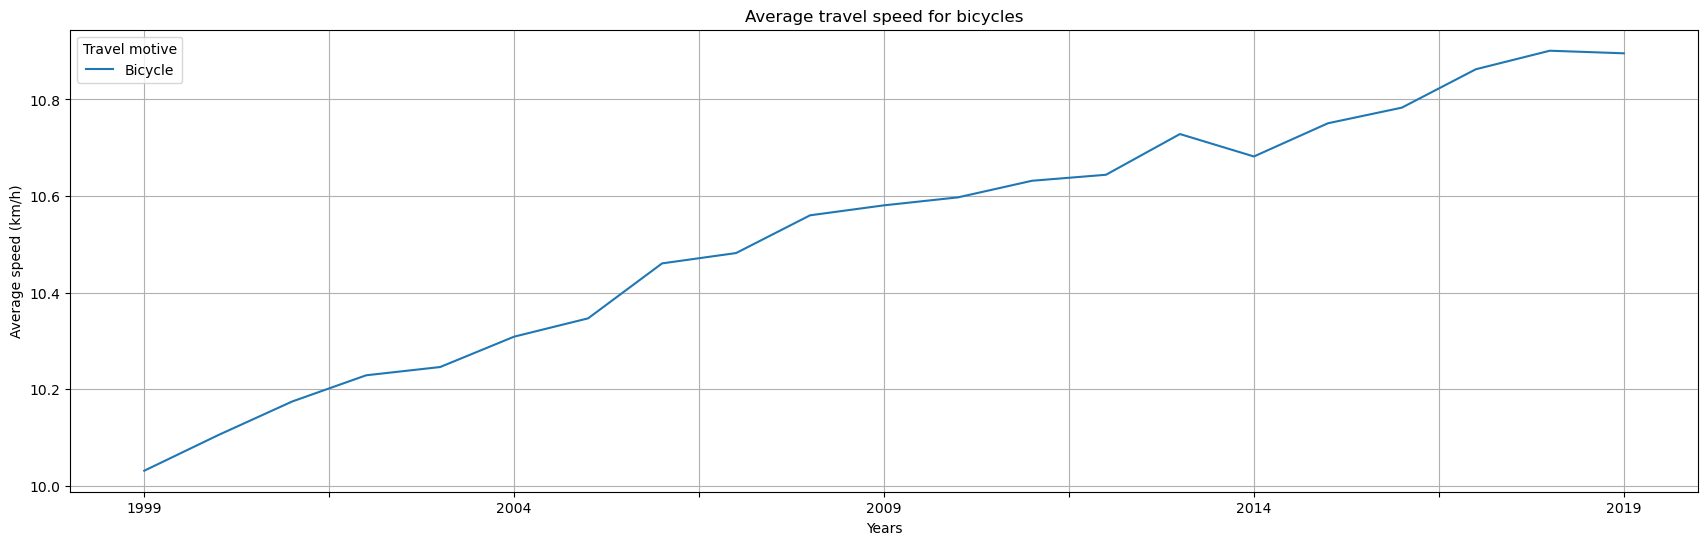

In [35]:
#Only  bikes
bicycle_columns = ['Bicycle']

plt.figure(figsize=(21, 6), dpi=100)
speeddata[bicycle_columns].plot(figsize=(21, 6))
plt.grid()
plt.title('Average travel speed for bicycles')
plt.xlabel('Years')
plt.ylabel('Average speed (km/h)')
plt.legend(title='Travel motive', loc='upper left')
plt.savefig('SubquestionWouterJelle_figures/travelspeedbicycles.png')